In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, accuracy_score, f1_score, precision_score, recall_score
import wandb

In [2]:
wandb.login(key='288db8f5afccc57f269ae50ac116d15047b1b705')

Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: Currently logged in as: mitanshkayathwal (mmavericks). Use `wandb login --relogin` to force relogin
wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: Appending key for api.wandb.ai to your netrc file: /Users/mitanshk/.netrc


True

In [3]:
df = pd.read_csv("HousingData.csv")
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


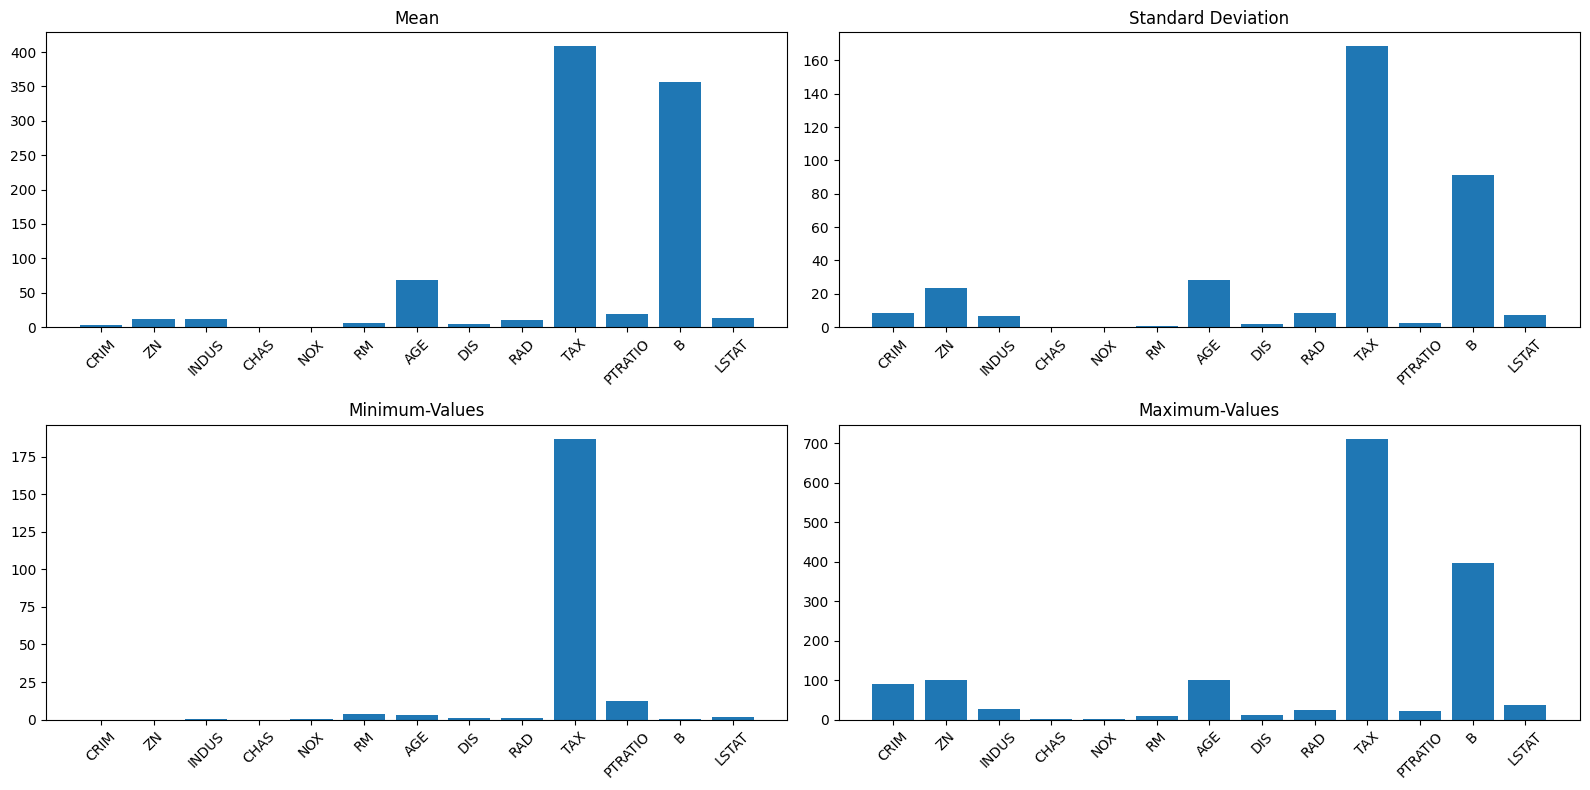

In [4]:
X = df.drop(columns=['MEDV'])
y = df['MEDV']

means = np.mean(X, axis=0)
std_devs = np.std(X, axis=0)
min_values = np.min(X, axis=0)
max_values = np.max(X, axis=0)
attribute_labels = X.columns.tolist()

fig, axs = plt.subplots(2, 2, figsize=(16, 8))

axs[0, 0].bar(attribute_labels, means)
axs[0, 0].set_title('Mean')

axs[0, 1].bar(attribute_labels, std_devs)
axs[0, 1].set_title('Standard Deviation')

axs[1, 0].bar(attribute_labels, min_values)
axs[1, 0].set_title('Minimum-Values')

axs[1, 1].bar(attribute_labels, max_values)
axs[1, 1].set_title('Maximum-Values')

for ax in axs.flat:
    ax.set_xticks(range(len(attribute_labels)))
    ax.set_xticklabels(attribute_labels, rotation=45)

plt.tight_layout()
plt.show()

In [5]:
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.2, random_state=42)

In [7]:
X_train.fillna(X_train.mean(), inplace=True)
X_val.fillna(X_val.mean(), inplace=True)
X_test.fillna(X_test.mean(), inplace=True)

std_scaler = StandardScaler()  
X_train = std_scaler.fit_transform(X_train)
X_val = std_scaler.transform(X_val)
X_test = std_scaler.transform(X_test)

y_train = np.array(y_train)
y_test = np.array(y_test)
y_val = np.array(y_val)

In [16]:
class MLPRegression:
    def __init__(self, X, y, learning_rate, activation_fn, num_layers, hidden_layer_sizes, epochs, optimizer='sgd', loss_fn='MSE',output_size = 1):
        self.X = X
        self.y = y
        self.learning_rate = learning_rate
        self.activation = activation_fn
        self.num_layers = num_layers
        self.hidden_layer_sizes = hidden_layer_sizes
        self.epochs = epochs
        self.output_size = output_size
        if(optimizer == 'sgd'):
            self.optimizer = self.stochastic_gradient_descent
        elif(optimizer == 'batch'):
            self.optimizer = self.batch_gradient_descent
        else:
            self.optimizer = self.minibatch_gradient_descent
        
        self.loss = self.MSE            
    
    def MSE(self, y_true, y_pred):
        mse = np.mean((y_true - y_pred) ** 2)
        return mse
    
    def RMSE(self, y_true):
        mse = self.MSE(y_true,self.output)
        rmse = np.sqrt(mse)
        return rmse
    
    def R_squared(self, y_true):
        mean_y = np.mean(y_true)
        ss_tot = np.sum((y_true - mean_y) ** 2)
        ss_res = np.sum((y_true - self.output) ** 2)
        r2 = 1 - (ss_res / ss_tot)
        return r2

    def relu(self, x):
        return np.maximum(0, x)

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def tanh(self, x):
        return np.tanh(x)

    def initialize_params(self):
        layers = [self.X.shape[1]] + self.hidden_layer_sizes + [self.output_size]

        self.weights = [np.random.randn(layers[i], layers[i+1]) for i in range(0,len(layers)-1)]
        self.biases = [np.zeros((1, layers[i])) for i in range(1,len(layers))]
        
    def derivative_activation(self, x):
        if self.activation == 'relu':
            return (x > 0).astype(float)
        elif self.activation == 'sigmoid':
            return x * (1 - x)
        elif self.activation == 'tanh':
            return 1 - x**2
    
    def forward_propagation(self, X):
        self.activations = []
        activation_output = -1
        layer_input = X
        self.activations.append(layer_input)
        for i in range(len(self.hidden_layer_sizes)+1):
            layer_output = np.dot(layer_input, self.weights[i]) + self.biases[i]
            if self.activation == 'relu':
                activation_output = self.relu(layer_output)
            elif self.activation == 'sigmoid':
                activation_output = self.sigmoid(layer_output)
            elif self.activation == 'tanh':
                activation_output = self.tanh(layer_output)
            self.output = layer_output
            if(i==len(self.hidden_layer_sizes)):
                self.activations.append(layer_output)
                break
            self.activations.append(activation_output)
            layer_input = activation_output
        return self.output

    def accuracy(self, y_pred, y):
        return accuracy_score(y_pred,y)

    def backward_propagation(self, y):
        y = y.reshape(-1,1)
        gradient_weights = [np.zeros(w.shape) for w in self.weights]
        gradient_biases = [np.zeros(b.shape) for b in self.biases]
        error = (self.output - y) * 2
        for i in range(1,len(self.weights)+1):
            gradient_weights[-i] = (self.activations[-i-1].T.dot(error))/len(y)
            gradient_biases[-i] = np.sum(error, axis=0, keepdims=True)/len(y)
            if(i!=len(self.weights)):
                error = self.derivative_activation(self.activations[-i-1])*(error.dot(self.weights[-i].T))

        return gradient_weights , gradient_biases
    

    def batch_gradient_descent(self):
        for epoch in range(self.epochs):
            self.forward_propagation(self.X)
            gradient_weights, gradient_biases = self.backward_propagation(self.y)
            train_loss = self.loss(self.y,self.output)
            self.train_losses.append(train_loss)
            for i in range(len(self.weights)):
                self.weights[i] -= self.learning_rate * gradient_weights[i]
                self.biases[i] -= self.learning_rate * gradient_biases[i]

    def minibatch_gradient_descent(self):
        batch_size = 8
        for epoch in range(self.epochs):
            X_batches = np.array_split(self.X,len(self.X)/batch_size)
            Y_batches = np.array_split(self.y,len(self.y)/batch_size)
            for batch_x,batch_y in zip(X_batches,Y_batches):
                self.forward_propagation(batch_x)
                grad_w, grad_b = self.backward_propagation(batch_y)
                for i in range(len(self.weights)):
                    self.weights[i] -= self.learning_rate * grad_w[i]
                    self.biases[i] -= self.learning_rate * grad_b[i]
            self.forward_propagation(self.X)
            self.train_losses.append(self.loss(self.y,self.output))
    
    def stochastic_gradient_descent(self):
        batch_size = 1
        for epoch in range(self.epochs):
            X_batches = np.array_split(self.X,len(self.X)/batch_size)
            Y_batches = np.array_split(self.y,len(self.y)/batch_size)
            for batch_x,batch_y in zip(X_batches,Y_batches):
                self.forward_propagation(batch_x)
                grad_w, grad_b = self.backward_propagation(batch_y)
                for i in range(len(self.weights)):
                    self.weights[i] -= self.learning_rate * grad_w[i]
                    self.biases[i] -= self.learning_rate * grad_b[i]
            self.forward_propagation(self.X)
            self.train_losses.append(self.loss(self.y,self.output))
            
    def fit(self):
        self.initialize_params()
        self.train_losses = []
        self.optimizer()

    def calculate_metrics(self, X, y):
        predictions = self.forward_propagation(X)
        return self.loss(y, predictions)
    
    def calculate_report(self, X, y):
        predictions = self.forward_propagation(X)
        predicted_labels = np.argmax(predictions, axis=1) + 3
        report = classification_report(y, predicted_labels,zero_division=1)
        return report

In [9]:
num_iters = 1000
y_train = y_train.reshape(-1,1)
y_test = y_test.reshape(-1,1)
y_val = y_val.reshape(-1,1)
np.random.seed(42)
mlp_reg = MLPRegression(X_train,y_train,0.0001,'tanh',2,[6, 6],num_iters,'minibatch','MSE',1)

Train Loss: 8.678989364170375


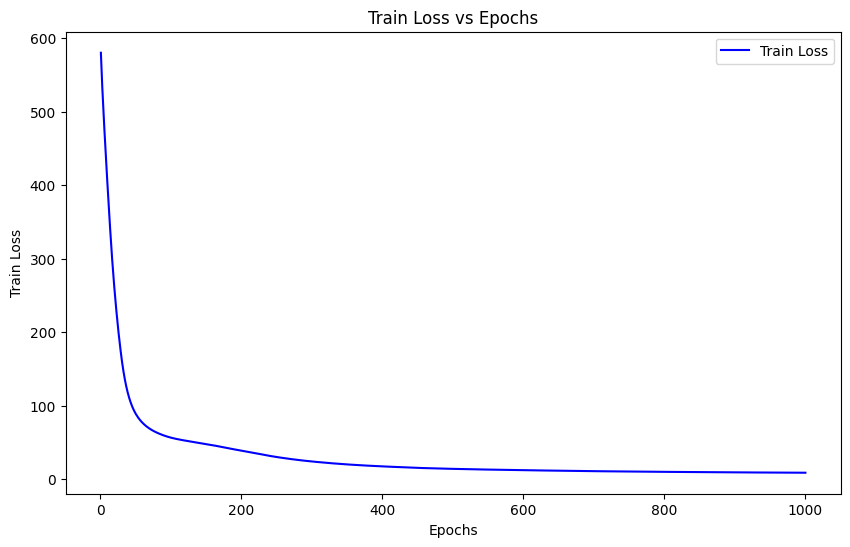

In [10]:
mlp_reg.fit()

train_loss = mlp_reg.train_losses
print("Train Loss: " + str(train_loss[-1]))
iter = list(range(1, num_iters+1))

plt.figure(figsize=(10, 6)) 
plt.plot(iter, train_loss, label='Train Loss', color='blue')
plt.xlabel('Epochs')
plt.ylabel('Train Loss')
plt.title('Train Loss vs Epochs')
plt.legend()
plt.show()

In [11]:
optimizers = ['sgd', 'batch', 'minibatch']
learning_rates = [0.01, 0.1]  
epochs_values = [200, 500, 1000]
hidden_layers_values = [[6, 6], [8, 8], [10, 10]] 
activation_functions = ['relu', 'tanh', 'sigmoid']

for optimizer in optimizers:
        for epochs_value in epochs_values:
            for hidden_layers in hidden_layers_values:
                for activation_function in activation_functions:
                    for learning_rate in learning_rates:
                        run = wandb.init(
                            project="SMAI_As3_Q3", entity="mitanshkayathwal"
                        )
                        wandb.config.update({"Activation Function": activation_function, "Optimizer": optimizer})
                        mlp_reg = MLPRegression(X_train,y_train,learning_rate,activation_function,len(hidden_layers), hidden_layers, epochs_value, optimizer, 'MSE', 1)
                        mlp_reg.fit()
                        val_loss = mlp_reg.calculate_metrics(X_val, y_val)
                        train_loss = mlp_reg.calculate_metrics(X_train, y_train)
                        wandb.log({
                        'Epochs': epochs_value,
                        'Hidden Layer': hidden_layers,
                        'Learning Rate': learning_rate,
                        'Validation Loss': val_loss,
                        'Train Loss': train_loss,
                    })

wandb: Currently logged in as: mitanshkayathwal. Use `wandb login --relogin` to force relogin


wandb: WARNING Source type is set to 'repo' but some required information is missing from the environment. A job will not be created from this run. See https://docs.wandb.ai/guides/launch/create-job


Epochs,▁
Learning Rate,▁
Train Loss,▁
Validation Loss,▁
Epochs,200
Learning Rate,0.01
Train Loss,91.72539
Validation Loss,72.09845


/var/folders/z6/m0l9ypjs6z39w60tv7__dxhc0000gn/T/ipykernel_57072/4009326010.py:92: RuntimeWarning: invalid value encountered in multiply
  error = self.derivative_activation(self.activations[-i-1])*(error.dot(self.weights[-i].T))


wandb: WARNING Source type is set to 'repo' but some required information is missing from the environment. A job will not be created from this run. See https://docs.wandb.ai/guides/launch/create-job


Epochs,▁
Learning Rate,▁
Epochs,200
Learning Rate,0.1
Train Loss,nan
Validation Loss,nan


wandb: WARNING Source type is set to 'repo' but some required information is missing from the environment. A job will not be created from this run. See https://docs.wandb.ai/guides/launch/create-job


Epochs,▁
Learning Rate,▁
Train Loss,▁
Validation Loss,▁
Epochs,200
Learning Rate,0.01
Train Loss,38.83588
Validation Loss,47.37009


wandb: WARNING Source type is set to 'repo' but some required information is missing from the environment. A job will not be created from this run. See https://docs.wandb.ai/guides/launch/create-job


Epochs,▁
Learning Rate,▁
Train Loss,▁
Validation Loss,▁
Epochs,200
Learning Rate,0.1
Train Loss,109.78228
Validation Loss,103.92773


wandb: WARNING Source type is set to 'repo' but some required information is missing from the environment. A job will not be created from this run. See https://docs.wandb.ai/guides/launch/create-job


Epochs,▁
Learning Rate,▁
Train Loss,▁
Validation Loss,▁
Epochs,200
Learning Rate,0.01
Train Loss,5.77602
Validation Loss,38.98168


wandb: WARNING Source type is set to 'repo' but some required information is missing from the environment. A job will not be created from this run. See https://docs.wandb.ai/guides/launch/create-job


Epochs,▁
Learning Rate,▁
Train Loss,▁
Validation Loss,▁
Epochs,200
Learning Rate,0.1
Train Loss,60.41725
Validation Loss,67.71013


wandb: WARNING Source type is set to 'repo' but some required information is missing from the environment. A job will not be created from this run. See https://docs.wandb.ai/guides/launch/create-job


Epochs,▁
Learning Rate,▁
Train Loss,▁
Validation Loss,▁
Epochs,200
Learning Rate,0.01
Train Loss,91.72539
Validation Loss,72.09845


wandb: WARNING Source type is set to 'repo' but some required information is missing from the environment. A job will not be created from this run. See https://docs.wandb.ai/guides/launch/create-job


Epochs,▁
Learning Rate,▁
Train Loss,▁
Validation Loss,▁
Epochs,200
Learning Rate,0.1
Train Loss,92.1037
Validation Loss,72.25997


wandb: WARNING Source type is set to 'repo' but some required information is missing from the environment. A job will not be created from this run. See https://docs.wandb.ai/guides/launch/create-job


Epochs,▁
Learning Rate,▁
Train Loss,▁
Validation Loss,▁
Epochs,200
Learning Rate,0.01
Train Loss,33.01319
Validation Loss,44.68008


wandb: WARNING Source type is set to 'repo' but some required information is missing from the environment. A job will not be created from this run. See https://docs.wandb.ai/guides/launch/create-job


Epochs,▁
Learning Rate,▁
Train Loss,▁
Validation Loss,▁
Epochs,200
Learning Rate,0.1
Train Loss,139.47448
Validation Loss,139.84876


wandb: WARNING Source type is set to 'repo' but some required information is missing from the environment. A job will not be created from this run. See https://docs.wandb.ai/guides/launch/create-job


Epochs,▁
Learning Rate,▁
Train Loss,▁
Validation Loss,▁
Epochs,200
Learning Rate,0.01
Train Loss,9.98582
Validation Loss,28.29427


/var/folders/z6/m0l9ypjs6z39w60tv7__dxhc0000gn/T/ipykernel_57072/4009326010.py:40: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


wandb: WARNING Source type is set to 'repo' but some required information is missing from the environment. A job will not be created from this run. See https://docs.wandb.ai/guides/launch/create-job


Epochs,▁
Learning Rate,▁
Train Loss,▁
Validation Loss,▁
Epochs,200
Learning Rate,0.1
Train Loss,42.44829
Validation Loss,44.23268


wandb: WARNING Source type is set to 'repo' but some required information is missing from the environment. A job will not be created from this run. See https://docs.wandb.ai/guides/launch/create-job


Epochs,▁
Learning Rate,▁
Train Loss,▁
Validation Loss,▁
Epochs,200
Learning Rate,0.01
Train Loss,91.72539
Validation Loss,72.09845


/var/folders/z6/m0l9ypjs6z39w60tv7__dxhc0000gn/T/ipykernel_57072/4009326010.py:92: RuntimeWarning: invalid value encountered in multiply
  error = self.derivative_activation(self.activations[-i-1])*(error.dot(self.weights[-i].T))


wandb: WARNING Source type is set to 'repo' but some required information is missing from the environment. A job will not be created from this run. See https://docs.wandb.ai/guides/launch/create-job


Epochs,▁
Learning Rate,▁
Epochs,200
Learning Rate,0.1
Train Loss,nan
Validation Loss,nan


wandb: WARNING Source type is set to 'repo' but some required information is missing from the environment. A job will not be created from this run. See https://docs.wandb.ai/guides/launch/create-job


Epochs,▁
Learning Rate,▁
Train Loss,▁
Validation Loss,▁
Epochs,200
Learning Rate,0.01
Train Loss,34.89945
Validation Loss,50.6933


/var/folders/z6/m0l9ypjs6z39w60tv7__dxhc0000gn/T/ipykernel_57072/4009326010.py:92: RuntimeWarning: invalid value encountered in multiply
  error = self.derivative_activation(self.activations[-i-1])*(error.dot(self.weights[-i].T))


wandb: WARNING Source type is set to 'repo' but some required information is missing from the environment. A job will not be created from this run. See https://docs.wandb.ai/guides/launch/create-job


Epochs,▁
Learning Rate,▁
Epochs,200
Learning Rate,0.1
Train Loss,nan
Validation Loss,nan


wandb: WARNING Source type is set to 'repo' but some required information is missing from the environment. A job will not be created from this run. See https://docs.wandb.ai/guides/launch/create-job


Epochs,▁
Learning Rate,▁
Train Loss,▁
Validation Loss,▁
Epochs,200
Learning Rate,0.01
Train Loss,4.8005
Validation Loss,22.8164


/var/folders/z6/m0l9ypjs6z39w60tv7__dxhc0000gn/T/ipykernel_57072/4009326010.py:40: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


wandb: WARNING Source type is set to 'repo' but some required information is missing from the environment. A job will not be created from this run. See https://docs.wandb.ai/guides/launch/create-job


Epochs,▁
Learning Rate,▁
Train Loss,▁
Validation Loss,▁
Epochs,200
Learning Rate,0.1
Train Loss,48.6562
Validation Loss,76.30708


wandb: WARNING Source type is set to 'repo' but some required information is missing from the environment. A job will not be created from this run. See https://docs.wandb.ai/guides/launch/create-job


Epochs,▁
Learning Rate,▁
Train Loss,▁
Validation Loss,▁
Epochs,500
Learning Rate,0.01
Train Loss,91.72539
Validation Loss,72.09845


wandb: WARNING Source type is set to 'repo' but some required information is missing from the environment. A job will not be created from this run. See https://docs.wandb.ai/guides/launch/create-job


Epochs,▁
Learning Rate,▁
Train Loss,▁
Validation Loss,▁
Epochs,500
Learning Rate,0.1
Train Loss,92.1037
Validation Loss,72.25997


wandb: WARNING Source type is set to 'repo' but some required information is missing from the environment. A job will not be created from this run. See https://docs.wandb.ai/guides/launch/create-job


Epochs,▁
Learning Rate,▁
Train Loss,▁
Validation Loss,▁
Epochs,500
Learning Rate,0.01
Train Loss,40.17604
Validation Loss,47.34624


wandb: WARNING Source type is set to 'repo' but some required information is missing from the environment. A job will not be created from this run. See https://docs.wandb.ai/guides/launch/create-job


Epochs,▁
Learning Rate,▁
Train Loss,▁
Validation Loss,▁
Epochs,500
Learning Rate,0.1
Train Loss,91.22821
Validation Loss,77.36463


wandb: WARNING Source type is set to 'repo' but some required information is missing from the environment. A job will not be created from this run. See https://docs.wandb.ai/guides/launch/create-job


Epochs,▁
Learning Rate,▁
Train Loss,▁
Validation Loss,▁
Epochs,500
Learning Rate,0.01
Train Loss,10.53064
Validation Loss,24.2255


/var/folders/z6/m0l9ypjs6z39w60tv7__dxhc0000gn/T/ipykernel_57072/4009326010.py:40: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


wandb: WARNING Source type is set to 'repo' but some required information is missing from the environment. A job will not be created from this run. See https://docs.wandb.ai/guides/launch/create-job


Epochs,▁
Learning Rate,▁
Train Loss,▁
Validation Loss,▁
Epochs,500
Learning Rate,0.1
Train Loss,59.43487
Validation Loss,47.79149


wandb: WARNING Source type is set to 'repo' but some required information is missing from the environment. A job will not be created from this run. See https://docs.wandb.ai/guides/launch/create-job


Epochs,▁
Learning Rate,▁
Train Loss,▁
Validation Loss,▁
Epochs,500
Learning Rate,0.01
Train Loss,91.72539
Validation Loss,72.09845


wandb: WARNING Source type is set to 'repo' but some required information is missing from the environment. A job will not be created from this run. See https://docs.wandb.ai/guides/launch/create-job


Epochs,▁
Learning Rate,▁
Train Loss,▁
Validation Loss,▁
Epochs,500
Learning Rate,0.1
Train Loss,92.1037
Validation Loss,72.25997


wandb: WARNING Source type is set to 'repo' but some required information is missing from the environment. A job will not be created from this run. See https://docs.wandb.ai/guides/launch/create-job


Epochs,▁
Learning Rate,▁
Train Loss,▁
Validation Loss,▁
Epochs,500
Learning Rate,0.01
Train Loss,20.67433
Validation Loss,37.69956


wandb: WARNING Source type is set to 'repo' but some required information is missing from the environment. A job will not be created from this run. See https://docs.wandb.ai/guides/launch/create-job


Epochs,▁
Learning Rate,▁
Train Loss,▁
Validation Loss,▁
Epochs,500
Learning Rate,0.1
Train Loss,106.30492
Validation Loss,115.59528


wandb: WARNING Source type is set to 'repo' but some required information is missing from the environment. A job will not be created from this run. See https://docs.wandb.ai/guides/launch/create-job


Epochs,▁
Learning Rate,▁
Train Loss,▁
Validation Loss,▁
Epochs,500
Learning Rate,0.01
Train Loss,8.13385
Validation Loss,28.97846


/var/folders/z6/m0l9ypjs6z39w60tv7__dxhc0000gn/T/ipykernel_57072/4009326010.py:40: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


wandb: WARNING Source type is set to 'repo' but some required information is missing from the environment. A job will not be created from this run. See https://docs.wandb.ai/guides/launch/create-job


Epochs,▁
Learning Rate,▁
Train Loss,▁
Validation Loss,▁
Epochs,500
Learning Rate,0.1
Train Loss,36.134
Validation Loss,48.86452


wandb: WARNING Source type is set to 'repo' but some required information is missing from the environment. A job will not be created from this run. See https://docs.wandb.ai/guides/launch/create-job


Epochs,▁
Learning Rate,▁
Train Loss,▁
Validation Loss,▁
Epochs,500
Learning Rate,0.01
Train Loss,91.72539
Validation Loss,72.09845


/var/folders/z6/m0l9ypjs6z39w60tv7__dxhc0000gn/T/ipykernel_57072/4009326010.py:92: RuntimeWarning: invalid value encountered in multiply
  error = self.derivative_activation(self.activations[-i-1])*(error.dot(self.weights[-i].T))


wandb: WARNING Source type is set to 'repo' but some required information is missing from the environment. A job will not be created from this run. See https://docs.wandb.ai/guides/launch/create-job


Epochs,▁
Learning Rate,▁
Epochs,500
Learning Rate,0.1
Train Loss,nan
Validation Loss,nan


wandb: WARNING Source type is set to 'repo' but some required information is missing from the environment. A job will not be created from this run. See https://docs.wandb.ai/guides/launch/create-job


Epochs,▁
Learning Rate,▁
Train Loss,▁
Validation Loss,▁
Epochs,500
Learning Rate,0.01
Train Loss,28.71366
Validation Loss,44.81477


/var/folders/z6/m0l9ypjs6z39w60tv7__dxhc0000gn/T/ipykernel_57072/4009326010.py:92: RuntimeWarning: invalid value encountered in multiply
  error = self.derivative_activation(self.activations[-i-1])*(error.dot(self.weights[-i].T))


wandb: WARNING Source type is set to 'repo' but some required information is missing from the environment. A job will not be created from this run. See https://docs.wandb.ai/guides/launch/create-job


Epochs,▁
Learning Rate,▁
Epochs,500
Learning Rate,0.1
Train Loss,nan
Validation Loss,nan


wandb: WARNING Source type is set to 'repo' but some required information is missing from the environment. A job will not be created from this run. See https://docs.wandb.ai/guides/launch/create-job


Epochs,▁
Learning Rate,▁
Train Loss,▁
Validation Loss,▁
Epochs,500
Learning Rate,0.01
Train Loss,2.33455
Validation Loss,22.89931


/var/folders/z6/m0l9ypjs6z39w60tv7__dxhc0000gn/T/ipykernel_57072/4009326010.py:40: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


wandb: WARNING Source type is set to 'repo' but some required information is missing from the environment. A job will not be created from this run. See https://docs.wandb.ai/guides/launch/create-job


Epochs,▁
Learning Rate,▁
Train Loss,▁
Validation Loss,▁
Epochs,500
Learning Rate,0.1
Train Loss,60.7149
Validation Loss,48.15549


wandb: WARNING Source type is set to 'repo' but some required information is missing from the environment. A job will not be created from this run. See https://docs.wandb.ai/guides/launch/create-job


Epochs,▁
Learning Rate,▁
Train Loss,▁
Validation Loss,▁
Epochs,1000
Learning Rate,0.01
Train Loss,91.72539
Validation Loss,72.09845


/var/folders/z6/m0l9ypjs6z39w60tv7__dxhc0000gn/T/ipykernel_57072/4009326010.py:92: RuntimeWarning: invalid value encountered in multiply
  error = self.derivative_activation(self.activations[-i-1])*(error.dot(self.weights[-i].T))


wandb: WARNING Source type is set to 'repo' but some required information is missing from the environment. A job will not be created from this run. See https://docs.wandb.ai/guides/launch/create-job


Epochs,▁
Learning Rate,▁
Epochs,1000
Learning Rate,0.1
Train Loss,nan
Validation Loss,nan


wandb: WARNING Source type is set to 'repo' but some required information is missing from the environment. A job will not be created from this run. See https://docs.wandb.ai/guides/launch/create-job


Epochs,▁
Learning Rate,▁
Train Loss,▁
Validation Loss,▁
Epochs,1000
Learning Rate,0.01
Train Loss,27.30126
Validation Loss,47.25713


wandb: WARNING Source type is set to 'repo' but some required information is missing from the environment. A job will not be created from this run. See https://docs.wandb.ai/guides/launch/create-job


Epochs,▁
Learning Rate,▁
Train Loss,▁
Validation Loss,▁
Epochs,1000
Learning Rate,0.1
Train Loss,108.18577
Validation Loss,94.61031


wandb: WARNING Source type is set to 'repo' but some required information is missing from the environment. A job will not be created from this run. See https://docs.wandb.ai/guides/launch/create-job


Epochs,▁
Learning Rate,▁
Train Loss,▁
Validation Loss,▁
Epochs,1000
Learning Rate,0.01
Train Loss,9.73055
Validation Loss,29.09333


/var/folders/z6/m0l9ypjs6z39w60tv7__dxhc0000gn/T/ipykernel_57072/4009326010.py:40: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


wandb: WARNING Source type is set to 'repo' but some required information is missing from the environment. A job will not be created from this run. See https://docs.wandb.ai/guides/launch/create-job


Epochs,▁
Learning Rate,▁
Train Loss,▁
Validation Loss,▁
Epochs,1000
Learning Rate,0.1
Train Loss,40.50197
Validation Loss,47.54143


wandb: WARNING Source type is set to 'repo' but some required information is missing from the environment. A job will not be created from this run. See https://docs.wandb.ai/guides/launch/create-job


Epochs,▁
Learning Rate,▁
Train Loss,▁
Validation Loss,▁
Epochs,1000
Learning Rate,0.01
Train Loss,89.04488
Validation Loss,72.69855


/var/folders/z6/m0l9ypjs6z39w60tv7__dxhc0000gn/T/ipykernel_57072/4009326010.py:92: RuntimeWarning: invalid value encountered in multiply
  error = self.derivative_activation(self.activations[-i-1])*(error.dot(self.weights[-i].T))


wandb: WARNING Source type is set to 'repo' but some required information is missing from the environment. A job will not be created from this run. See https://docs.wandb.ai/guides/launch/create-job


Epochs,▁
Learning Rate,▁
Epochs,1000
Learning Rate,0.1
Train Loss,nan
Validation Loss,nan


wandb: WARNING Source type is set to 'repo' but some required information is missing from the environment. A job will not be created from this run. See https://docs.wandb.ai/guides/launch/create-job


Epochs,▁
Learning Rate,▁
Train Loss,▁
Validation Loss,▁
Epochs,1000
Learning Rate,0.01
Train Loss,31.50914
Validation Loss,45.70958


wandb: WARNING Source type is set to 'repo' but some required information is missing from the environment. A job will not be created from this run. See https://docs.wandb.ai/guides/launch/create-job


Epochs,▁
Learning Rate,▁
Train Loss,▁
Validation Loss,▁
Epochs,1000
Learning Rate,0.1
Train Loss,84.66489
Validation Loss,73.93634


wandb: WARNING Source type is set to 'repo' but some required information is missing from the environment. A job will not be created from this run. See https://docs.wandb.ai/guides/launch/create-job


Epochs,▁
Learning Rate,▁
Train Loss,▁
Validation Loss,▁
Epochs,1000
Learning Rate,0.01
Train Loss,4.17963
Validation Loss,33.45095


/var/folders/z6/m0l9ypjs6z39w60tv7__dxhc0000gn/T/ipykernel_57072/4009326010.py:40: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


wandb: WARNING Source type is set to 'repo' but some required information is missing from the environment. A job will not be created from this run. See https://docs.wandb.ai/guides/launch/create-job


Epochs,▁
Learning Rate,▁
Train Loss,▁
Validation Loss,▁
Epochs,1000
Learning Rate,0.1
Train Loss,63.7457
Validation Loss,54.04474


/var/folders/z6/m0l9ypjs6z39w60tv7__dxhc0000gn/T/ipykernel_57072/4009326010.py:92: RuntimeWarning: invalid value encountered in multiply
  error = self.derivative_activation(self.activations[-i-1])*(error.dot(self.weights[-i].T))


wandb: WARNING Source type is set to 'repo' but some required information is missing from the environment. A job will not be created from this run. See https://docs.wandb.ai/guides/launch/create-job


Epochs,▁
Learning Rate,▁
Epochs,1000
Learning Rate,0.01
Train Loss,nan
Validation Loss,nan


/var/folders/z6/m0l9ypjs6z39w60tv7__dxhc0000gn/T/ipykernel_57072/4009326010.py:92: RuntimeWarning: invalid value encountered in multiply
  error = self.derivative_activation(self.activations[-i-1])*(error.dot(self.weights[-i].T))


wandb: WARNING Source type is set to 'repo' but some required information is missing from the environment. A job will not be created from this run. See https://docs.wandb.ai/guides/launch/create-job


Epochs,▁
Learning Rate,▁
Epochs,1000
Learning Rate,0.1
Train Loss,nan
Validation Loss,nan


wandb: WARNING Source type is set to 'repo' but some required information is missing from the environment. A job will not be created from this run. See https://docs.wandb.ai/guides/launch/create-job


Epochs,▁
Learning Rate,▁
Train Loss,▁
Validation Loss,▁
Epochs,1000
Learning Rate,0.01
Train Loss,18.69837
Validation Loss,40.42052


/var/folders/z6/m0l9ypjs6z39w60tv7__dxhc0000gn/T/ipykernel_57072/4009326010.py:92: RuntimeWarning: invalid value encountered in multiply
  error = self.derivative_activation(self.activations[-i-1])*(error.dot(self.weights[-i].T))


wandb: WARNING Source type is set to 'repo' but some required information is missing from the environment. A job will not be created from this run. See https://docs.wandb.ai/guides/launch/create-job


Epochs,▁
Learning Rate,▁
Epochs,1000
Learning Rate,0.1
Train Loss,nan
Validation Loss,nan


wandb: WARNING Source type is set to 'repo' but some required information is missing from the environment. A job will not be created from this run. See https://docs.wandb.ai/guides/launch/create-job


Epochs,▁
Learning Rate,▁
Train Loss,▁
Validation Loss,▁
Epochs,1000
Learning Rate,0.01
Train Loss,6.14367
Validation Loss,31.75294


/var/folders/z6/m0l9ypjs6z39w60tv7__dxhc0000gn/T/ipykernel_57072/4009326010.py:40: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


wandb: WARNING Source type is set to 'repo' but some required information is missing from the environment. A job will not be created from this run. See https://docs.wandb.ai/guides/launch/create-job


Epochs,▁
Learning Rate,▁
Train Loss,▁
Validation Loss,▁
Epochs,1000
Learning Rate,0.1
Train Loss,74.07989
Validation Loss,61.58253


wandb: WARNING Source type is set to 'repo' but some required information is missing from the environment. A job will not be created from this run. See https://docs.wandb.ai/guides/launch/create-job


Epochs,▁
Learning Rate,▁
Train Loss,▁
Validation Loss,▁
Epochs,200
Learning Rate,0.01
Train Loss,90.99407
Validation Loss,71.31074


wandb: WARNING Source type is set to 'repo' but some required information is missing from the environment. A job will not be created from this run. See https://docs.wandb.ai/guides/launch/create-job


Epochs,▁
Learning Rate,▁
Train Loss,▁
Validation Loss,▁
Epochs,200
Learning Rate,0.1
Train Loss,90.82844
Validation Loss,71.10262


wandb: WARNING Source type is set to 'repo' but some required information is missing from the environment. A job will not be created from this run. See https://docs.wandb.ai/guides/launch/create-job


Epochs,▁
Learning Rate,▁
Train Loss,▁
Validation Loss,▁
Epochs,200
Learning Rate,0.01
Train Loss,14.74594
Validation Loss,31.41066


wandb: WARNING Source type is set to 'repo' but some required information is missing from the environment. A job will not be created from this run. See https://docs.wandb.ai/guides/launch/create-job


Epochs,▁
Learning Rate,▁
Train Loss,▁
Validation Loss,▁
Epochs,200
Learning Rate,0.1
Train Loss,11.86711
Validation Loss,32.75897


wandb: WARNING Source type is set to 'repo' but some required information is missing from the environment. A job will not be created from this run. See https://docs.wandb.ai/guides/launch/create-job


Epochs,▁
Learning Rate,▁
Train Loss,▁
Validation Loss,▁
Epochs,200
Learning Rate,0.01
Train Loss,22.91115
Validation Loss,25.88289


wandb: WARNING Source type is set to 'repo' but some required information is missing from the environment. A job will not be created from this run. See https://docs.wandb.ai/guides/launch/create-job


Epochs,▁
Learning Rate,▁
Train Loss,▁
Validation Loss,▁
Epochs,200
Learning Rate,0.1
Train Loss,8.02184
Validation Loss,24.58705


wandb: WARNING Source type is set to 'repo' but some required information is missing from the environment. A job will not be created from this run. See https://docs.wandb.ai/guides/launch/create-job


Epochs,▁
Learning Rate,▁
Train Loss,▁
Validation Loss,▁
Epochs,200
Learning Rate,0.01
Train Loss,21.75766
Validation Loss,38.29224


wandb: WARNING Source type is set to 'repo' but some required information is missing from the environment. A job will not be created from this run. See https://docs.wandb.ai/guides/launch/create-job


Epochs,▁
Learning Rate,▁
Train Loss,▁
Validation Loss,▁
Epochs,200
Learning Rate,0.1
Train Loss,90.82844
Validation Loss,71.10262


wandb: WARNING Source type is set to 'repo' but some required information is missing from the environment. A job will not be created from this run. See https://docs.wandb.ai/guides/launch/create-job


Epochs,▁
Learning Rate,▁
Train Loss,▁
Validation Loss,▁
Epochs,200
Learning Rate,0.01
Train Loss,11.56736
Validation Loss,26.8792


wandb: WARNING Source type is set to 'repo' but some required information is missing from the environment. A job will not be created from this run. See https://docs.wandb.ai/guides/launch/create-job


Epochs,▁
Learning Rate,▁
Train Loss,▁
Validation Loss,▁
Epochs,200
Learning Rate,0.1
Train Loss,8.04529
Validation Loss,28.39792


wandb: WARNING Source type is set to 'repo' but some required information is missing from the environment. A job will not be created from this run. See https://docs.wandb.ai/guides/launch/create-job


Epochs,▁
Learning Rate,▁
Train Loss,▁
Validation Loss,▁
Epochs,200
Learning Rate,0.01
Train Loss,18.23963
Validation Loss,24.5348


wandb: WARNING Source type is set to 'repo' but some required information is missing from the environment. A job will not be created from this run. See https://docs.wandb.ai/guides/launch/create-job


Epochs,▁
Learning Rate,▁
Train Loss,▁
Validation Loss,▁
Epochs,200
Learning Rate,0.1
Train Loss,7.21913
Validation Loss,21.43741


wandb: WARNING Source type is set to 'repo' but some required information is missing from the environment. A job will not be created from this run. See https://docs.wandb.ai/guides/launch/create-job


Epochs,▁
Learning Rate,▁
Train Loss,▁
Validation Loss,▁
Epochs,200
Learning Rate,0.01
Train Loss,24.16118
Validation Loss,36.43973


wandb: WARNING Source type is set to 'repo' but some required information is missing from the environment. A job will not be created from this run. See https://docs.wandb.ai/guides/launch/create-job


Epochs,▁
Learning Rate,▁
Train Loss,▁
Validation Loss,▁
Epochs,200
Learning Rate,0.1
Train Loss,90.82844
Validation Loss,71.10262


wandb: WARNING Source type is set to 'repo' but some required information is missing from the environment. A job will not be created from this run. See https://docs.wandb.ai/guides/launch/create-job


Epochs,▁
Learning Rate,▁
Train Loss,▁
Validation Loss,▁
Epochs,200
Learning Rate,0.01
Train Loss,9.51145
Validation Loss,29.84718


wandb: WARNING Source type is set to 'repo' but some required information is missing from the environment. A job will not be created from this run. See https://docs.wandb.ai/guides/launch/create-job


Epochs,▁
Learning Rate,▁
Train Loss,▁
Validation Loss,▁
Epochs,200
Learning Rate,0.1
Train Loss,6.97487
Validation Loss,33.19422


wandb: WARNING Source type is set to 'repo' but some required information is missing from the environment. A job will not be created from this run. See https://docs.wandb.ai/guides/launch/create-job


Epochs,▁
Learning Rate,▁
Train Loss,▁
Validation Loss,▁
Epochs,200
Learning Rate,0.01
Train Loss,18.41389
Validation Loss,23.45211


wandb: WARNING Source type is set to 'repo' but some required information is missing from the environment. A job will not be created from this run. See https://docs.wandb.ai/guides/launch/create-job


Epochs,▁
Learning Rate,▁
Train Loss,▁
Validation Loss,▁
Epochs,200
Learning Rate,0.1
Train Loss,7.79384
Validation Loss,24.00894


wandb: WARNING Source type is set to 'repo' but some required information is missing from the environment. A job will not be created from this run. See https://docs.wandb.ai/guides/launch/create-job


Epochs,▁
Learning Rate,▁
Train Loss,▁
Validation Loss,▁
Epochs,500
Learning Rate,0.01
Train Loss,90.82844
Validation Loss,71.10272


wandb: WARNING Source type is set to 'repo' but some required information is missing from the environment. A job will not be created from this run. See https://docs.wandb.ai/guides/launch/create-job


Epochs,▁
Learning Rate,▁
Train Loss,▁
Validation Loss,▁
Epochs,500
Learning Rate,0.1
Train Loss,90.82844
Validation Loss,71.10262


wandb: WARNING Source type is set to 'repo' but some required information is missing from the environment. A job will not be created from this run. See https://docs.wandb.ai/guides/launch/create-job


Epochs,▁
Learning Rate,▁
Train Loss,▁
Validation Loss,▁
Epochs,500
Learning Rate,0.01
Train Loss,8.20287
Validation Loss,28.4916


wandb: WARNING Source type is set to 'repo' but some required information is missing from the environment. A job will not be created from this run. See https://docs.wandb.ai/guides/launch/create-job


Epochs,▁
Learning Rate,▁
Train Loss,▁
Validation Loss,▁
Epochs,500
Learning Rate,0.1
Train Loss,9.26127
Validation Loss,32.98119


wandb: WARNING Source type is set to 'repo' but some required information is missing from the environment. A job will not be created from this run. See https://docs.wandb.ai/guides/launch/create-job


Epochs,▁
Learning Rate,▁
Train Loss,▁
Validation Loss,▁
Epochs,500
Learning Rate,0.01
Train Loss,11.96151
Validation Loss,23.30588


wandb: WARNING Source type is set to 'repo' but some required information is missing from the environment. A job will not be created from this run. See https://docs.wandb.ai/guides/launch/create-job


Epochs,▁
Learning Rate,▁
Train Loss,▁
Validation Loss,▁
Epochs,500
Learning Rate,0.1
Train Loss,6.50479
Validation Loss,28.03114


wandb: WARNING Source type is set to 'repo' but some required information is missing from the environment. A job will not be created from this run. See https://docs.wandb.ai/guides/launch/create-job


Epochs,▁
Learning Rate,▁
Train Loss,▁
Validation Loss,▁
Epochs,500
Learning Rate,0.01
Train Loss,90.82844
Validation Loss,71.10273


wandb: WARNING Source type is set to 'repo' but some required information is missing from the environment. A job will not be created from this run. See https://docs.wandb.ai/guides/launch/create-job


Epochs,▁
Learning Rate,▁
Train Loss,▁
Validation Loss,▁
Epochs,500
Learning Rate,0.1
Train Loss,90.82844
Validation Loss,71.10262


wandb: WARNING Source type is set to 'repo' but some required information is missing from the environment. A job will not be created from this run. See https://docs.wandb.ai/guides/launch/create-job


Epochs,▁
Learning Rate,▁
Train Loss,▁
Validation Loss,▁
Epochs,500
Learning Rate,0.01
Train Loss,8.01465
Validation Loss,37.4927


wandb: WARNING Source type is set to 'repo' but some required information is missing from the environment. A job will not be created from this run. See https://docs.wandb.ai/guides/launch/create-job


Epochs,▁
Learning Rate,▁
Train Loss,▁
Validation Loss,▁
Epochs,500
Learning Rate,0.1
Train Loss,7.66236
Validation Loss,34.26539


wandb: WARNING Source type is set to 'repo' but some required information is missing from the environment. A job will not be created from this run. See https://docs.wandb.ai/guides/launch/create-job


Epochs,▁
Learning Rate,▁
Train Loss,▁
Validation Loss,▁
Epochs,500
Learning Rate,0.01
Train Loss,13.46976
Validation Loss,20.71502


wandb: WARNING Source type is set to 'repo' but some required information is missing from the environment. A job will not be created from this run. See https://docs.wandb.ai/guides/launch/create-job


Epochs,▁
Learning Rate,▁
Train Loss,▁
Validation Loss,▁
Epochs,500
Learning Rate,0.1
Train Loss,6.27545
Validation Loss,19.33023


wandb: WARNING Source type is set to 'repo' but some required information is missing from the environment. A job will not be created from this run. See https://docs.wandb.ai/guides/launch/create-job


Epochs,▁
Learning Rate,▁
Train Loss,▁
Validation Loss,▁
Epochs,500
Learning Rate,0.01
Train Loss,90.82844
Validation Loss,71.10252


wandb: WARNING Source type is set to 'repo' but some required information is missing from the environment. A job will not be created from this run. See https://docs.wandb.ai/guides/launch/create-job


Epochs,▁
Learning Rate,▁
Epochs,500
Learning Rate,0.1
Train Loss,2.2307782170219523e+45
Validation Loss,2.2307782170219526e+45


wandb: WARNING Source type is set to 'repo' but some required information is missing from the environment. A job will not be created from this run. See https://docs.wandb.ai/guides/launch/create-job


Epochs,▁
Learning Rate,▁
Train Loss,▁
Validation Loss,▁
Epochs,500
Learning Rate,0.01
Train Loss,4.97566
Validation Loss,36.83972


wandb: WARNING Source type is set to 'repo' but some required information is missing from the environment. A job will not be created from this run. See https://docs.wandb.ai/guides/launch/create-job


Epochs,▁
Learning Rate,▁
Train Loss,▁
Validation Loss,▁
Epochs,500
Learning Rate,0.1
Train Loss,4.25262
Validation Loss,52.44253


wandb: WARNING Source type is set to 'repo' but some required information is missing from the environment. A job will not be created from this run. See https://docs.wandb.ai/guides/launch/create-job


Epochs,▁
Learning Rate,▁
Train Loss,▁
Validation Loss,▁
Epochs,500
Learning Rate,0.01
Train Loss,10.82814
Validation Loss,25.91419


wandb: WARNING Source type is set to 'repo' but some required information is missing from the environment. A job will not be created from this run. See https://docs.wandb.ai/guides/launch/create-job


Epochs,▁
Learning Rate,▁
Train Loss,▁
Validation Loss,▁
Epochs,500
Learning Rate,0.1
Train Loss,5.02818
Validation Loss,20.00754


wandb: WARNING Source type is set to 'repo' but some required information is missing from the environment. A job will not be created from this run. See https://docs.wandb.ai/guides/launch/create-job


Epochs,▁
Learning Rate,▁
Train Loss,▁
Validation Loss,▁
Epochs,1000
Learning Rate,0.01
Train Loss,7.02209
Validation Loss,15.25252


wandb: WARNING Source type is set to 'repo' but some required information is missing from the environment. A job will not be created from this run. See https://docs.wandb.ai/guides/launch/create-job


Epochs,▁
Learning Rate,▁
Train Loss,▁
Validation Loss,▁
Epochs,1000
Learning Rate,0.1
Train Loss,90.82844
Validation Loss,71.10262


wandb: WARNING Source type is set to 'repo' but some required information is missing from the environment. A job will not be created from this run. See https://docs.wandb.ai/guides/launch/create-job


Epochs,▁
Learning Rate,▁
Train Loss,▁
Validation Loss,▁
Epochs,1000
Learning Rate,0.01
Train Loss,5.99014
Validation Loss,28.21551


wandb: WARNING Source type is set to 'repo' but some required information is missing from the environment. A job will not be created from this run. See https://docs.wandb.ai/guides/launch/create-job


Epochs,▁
Learning Rate,▁
Train Loss,▁
Validation Loss,▁
Epochs,1000
Learning Rate,0.1
Train Loss,6.62535
Validation Loss,34.09266


wandb: WARNING Source type is set to 'repo' but some required information is missing from the environment. A job will not be created from this run. See https://docs.wandb.ai/guides/launch/create-job


Epochs,▁
Learning Rate,▁
Train Loss,▁
Validation Loss,▁
Epochs,1000
Learning Rate,0.01
Train Loss,7.16577
Validation Loss,22.77365


wandb: WARNING Source type is set to 'repo' but some required information is missing from the environment. A job will not be created from this run. See https://docs.wandb.ai/guides/launch/create-job


Epochs,▁
Learning Rate,▁
Train Loss,▁
Validation Loss,▁
Epochs,1000
Learning Rate,0.1
Train Loss,5.13685
Validation Loss,32.94268


wandb: WARNING Source type is set to 'repo' but some required information is missing from the environment. A job will not be created from this run. See https://docs.wandb.ai/guides/launch/create-job


Epochs,▁
Learning Rate,▁
Train Loss,▁
Validation Loss,▁
Epochs,1000
Learning Rate,0.01
Train Loss,6.73647
Validation Loss,15.36805


wandb: WARNING Source type is set to 'repo' but some required information is missing from the environment. A job will not be created from this run. See https://docs.wandb.ai/guides/launch/create-job


Epochs,▁
Learning Rate,▁
Train Loss,▁
Validation Loss,▁
Epochs,1000
Learning Rate,0.1
Train Loss,90.82844
Validation Loss,71.10262


wandb: WARNING Source type is set to 'repo' but some required information is missing from the environment. A job will not be created from this run. See https://docs.wandb.ai/guides/launch/create-job


Epochs,▁
Learning Rate,▁
Train Loss,▁
Validation Loss,▁
Epochs,1000
Learning Rate,0.01
Train Loss,6.29911
Validation Loss,39.66821


wandb: WARNING Source type is set to 'repo' but some required information is missing from the environment. A job will not be created from this run. See https://docs.wandb.ai/guides/launch/create-job


Epochs,▁
Learning Rate,▁
Train Loss,▁
Validation Loss,▁
Epochs,1000
Learning Rate,0.1
Train Loss,6.47254
Validation Loss,36.16322


wandb: WARNING Source type is set to 'repo' but some required information is missing from the environment. A job will not be created from this run. See https://docs.wandb.ai/guides/launch/create-job


Epochs,▁
Learning Rate,▁
Train Loss,▁
Validation Loss,▁
Epochs,1000
Learning Rate,0.01
Train Loss,6.48212
Validation Loss,20.08206


wandb: WARNING Source type is set to 'repo' but some required information is missing from the environment. A job will not be created from this run. See https://docs.wandb.ai/guides/launch/create-job


Epochs,▁
Learning Rate,▁
Train Loss,▁
Validation Loss,▁
Epochs,1000
Learning Rate,0.1
Train Loss,4.17905
Validation Loss,21.15673


wandb: WARNING Source type is set to 'repo' but some required information is missing from the environment. A job will not be created from this run. See https://docs.wandb.ai/guides/launch/create-job


Epochs,▁
Learning Rate,▁
Train Loss,▁
Validation Loss,▁
Epochs,1000
Learning Rate,0.01
Train Loss,90.82844
Validation Loss,71.10262


wandb: WARNING Source type is set to 'repo' but some required information is missing from the environment. A job will not be created from this run. See https://docs.wandb.ai/guides/launch/create-job


Epochs,▁
Learning Rate,▁
Train Loss,▁
Validation Loss,▁
Epochs,1000
Learning Rate,0.1
Train Loss,90.82844
Validation Loss,71.10262


wandb: WARNING Source type is set to 'repo' but some required information is missing from the environment. A job will not be created from this run. See https://docs.wandb.ai/guides/launch/create-job


Epochs,▁
Learning Rate,▁
Train Loss,▁
Validation Loss,▁
Epochs,1000
Learning Rate,0.01
Train Loss,5.04196
Validation Loss,33.27253


wandb: WARNING Source type is set to 'repo' but some required information is missing from the environment. A job will not be created from this run. See https://docs.wandb.ai/guides/launch/create-job


Epochs,▁
Learning Rate,▁
Train Loss,▁
Validation Loss,▁
Epochs,1000
Learning Rate,0.1
Train Loss,4.75566
Validation Loss,48.63423


wandb: WARNING Source type is set to 'repo' but some required information is missing from the environment. A job will not be created from this run. See https://docs.wandb.ai/guides/launch/create-job


Epochs,▁
Learning Rate,▁
Train Loss,▁
Validation Loss,▁
Epochs,1000
Learning Rate,0.01
Train Loss,5.9593
Validation Loss,22.82019


wandb: WARNING Source type is set to 'repo' but some required information is missing from the environment. A job will not be created from this run. See https://docs.wandb.ai/guides/launch/create-job


Epochs,▁
Learning Rate,▁
Train Loss,▁
Validation Loss,▁
Epochs,1000
Learning Rate,0.1
Train Loss,4.28163
Validation Loss,26.35713


wandb: WARNING Source type is set to 'repo' but some required information is missing from the environment. A job will not be created from this run. See https://docs.wandb.ai/guides/launch/create-job


Epochs,▁
Learning Rate,▁
Train Loss,▁
Validation Loss,▁
Epochs,200
Learning Rate,0.01
Train Loss,47.74265
Validation Loss,53.90845


wandb: WARNING Source type is set to 'repo' but some required information is missing from the environment. A job will not be created from this run. See https://docs.wandb.ai/guides/launch/create-job


Epochs,▁
Learning Rate,▁
Train Loss,▁
Validation Loss,▁
Epochs,200
Learning Rate,0.1
Train Loss,92.28703
Validation Loss,72.6873


wandb: WARNING Source type is set to 'repo' but some required information is missing from the environment. A job will not be created from this run. See https://docs.wandb.ai/guides/launch/create-job


Epochs,▁
Learning Rate,▁
Train Loss,▁
Validation Loss,▁
Epochs,200
Learning Rate,0.01
Train Loss,16.53835
Validation Loss,37.4058


wandb: WARNING Source type is set to 'repo' but some required information is missing from the environment. A job will not be created from this run. See https://docs.wandb.ai/guides/launch/create-job


Epochs,▁
Learning Rate,▁
Train Loss,▁
Validation Loss,▁
Epochs,200
Learning Rate,0.1
Train Loss,50.35402
Validation Loss,69.71928


wandb: WARNING Source type is set to 'repo' but some required information is missing from the environment. A job will not be created from this run. See https://docs.wandb.ai/guides/launch/create-job


Epochs,▁
Learning Rate,▁
Train Loss,▁
Validation Loss,▁
Epochs,200
Learning Rate,0.01
Train Loss,6.19193
Validation Loss,23.57302


wandb: WARNING Source type is set to 'repo' but some required information is missing from the environment. A job will not be created from this run. See https://docs.wandb.ai/guides/launch/create-job


Epochs,▁
Learning Rate,▁
Train Loss,▁
Validation Loss,▁
Epochs,200
Learning Rate,0.1
Train Loss,12.34713
Validation Loss,35.29497


wandb: WARNING Source type is set to 'repo' but some required information is missing from the environment. A job will not be created from this run. See https://docs.wandb.ai/guides/launch/create-job


Epochs,▁
Learning Rate,▁
Train Loss,▁
Validation Loss,▁
Epochs,200
Learning Rate,0.01
Train Loss,23.24238
Validation Loss,41.1495


wandb: WARNING Source type is set to 'repo' but some required information is missing from the environment. A job will not be created from this run. See https://docs.wandb.ai/guides/launch/create-job


Epochs,▁
Learning Rate,▁
Train Loss,▁
Validation Loss,▁
Epochs,200
Learning Rate,0.1
Train Loss,92.28703
Validation Loss,72.6873


wandb: WARNING Source type is set to 'repo' but some required information is missing from the environment. A job will not be created from this run. See https://docs.wandb.ai/guides/launch/create-job


Epochs,▁
Learning Rate,▁
Train Loss,▁
Validation Loss,▁
Epochs,200
Learning Rate,0.01
Train Loss,8.34338
Validation Loss,41.97667


wandb: WARNING Source type is set to 'repo' but some required information is missing from the environment. A job will not be created from this run. See https://docs.wandb.ai/guides/launch/create-job


Epochs,▁
Learning Rate,▁
Train Loss,▁
Validation Loss,▁
Epochs,200
Learning Rate,0.1
Train Loss,48.72444
Validation Loss,54.01267


wandb: WARNING Source type is set to 'repo' but some required information is missing from the environment. A job will not be created from this run. See https://docs.wandb.ai/guides/launch/create-job


Epochs,▁
Learning Rate,▁
Train Loss,▁
Validation Loss,▁
Epochs,200
Learning Rate,0.01
Train Loss,3.97602
Validation Loss,29.00302


wandb: WARNING Source type is set to 'repo' but some required information is missing from the environment. A job will not be created from this run. See https://docs.wandb.ai/guides/launch/create-job


Epochs,▁
Learning Rate,▁
Train Loss,▁
Validation Loss,▁
Epochs,200
Learning Rate,0.1
Train Loss,12.35344
Validation Loss,34.18465


wandb: WARNING Source type is set to 'repo' but some required information is missing from the environment. A job will not be created from this run. See https://docs.wandb.ai/guides/launch/create-job


Epochs,▁
Learning Rate,▁
Train Loss,▁
Validation Loss,▁
Epochs,200
Learning Rate,0.01
Train Loss,87.95746
Validation Loss,68.88617


wandb: WARNING Source type is set to 'repo' but some required information is missing from the environment. A job will not be created from this run. See https://docs.wandb.ai/guides/launch/create-job


Epochs,▁
Learning Rate,▁
Train Loss,▁
Validation Loss,▁
Epochs,200
Learning Rate,0.1
Train Loss,92.28703
Validation Loss,72.6873


wandb: WARNING Source type is set to 'repo' but some required information is missing from the environment. A job will not be created from this run. See https://docs.wandb.ai/guides/launch/create-job


Epochs,▁
Learning Rate,▁
Train Loss,▁
Validation Loss,▁
Epochs,200
Learning Rate,0.01
Train Loss,3.10465
Validation Loss,46.66201


wandb: WARNING Source type is set to 'repo' but some required information is missing from the environment. A job will not be created from this run. See https://docs.wandb.ai/guides/launch/create-job


Epochs,▁
Learning Rate,▁
Train Loss,▁
Validation Loss,▁
Epochs,200
Learning Rate,0.1
Train Loss,51.14432
Validation Loss,50.57091


wandb: WARNING Source type is set to 'repo' but some required information is missing from the environment. A job will not be created from this run. See https://docs.wandb.ai/guides/launch/create-job


Epochs,▁
Learning Rate,▁
Train Loss,▁
Validation Loss,▁
Epochs,200
Learning Rate,0.01
Train Loss,3.41079
Validation Loss,17.4983


wandb: WARNING Source type is set to 'repo' but some required information is missing from the environment. A job will not be created from this run. See https://docs.wandb.ai/guides/launch/create-job


Epochs,▁
Learning Rate,▁
Train Loss,▁
Validation Loss,▁
Epochs,200
Learning Rate,0.1
Train Loss,10.23668
Validation Loss,28.48258


wandb: WARNING Source type is set to 'repo' but some required information is missing from the environment. A job will not be created from this run. See https://docs.wandb.ai/guides/launch/create-job


Epochs,▁
Learning Rate,▁
Train Loss,▁
Validation Loss,▁
Epochs,500
Learning Rate,0.01
Train Loss,90.10505
Validation Loss,69.82633


wandb: WARNING Source type is set to 'repo' but some required information is missing from the environment. A job will not be created from this run. See https://docs.wandb.ai/guides/launch/create-job


Epochs,▁
Learning Rate,▁
Train Loss,▁
Validation Loss,▁
Epochs,500
Learning Rate,0.1
Train Loss,92.28703
Validation Loss,72.6873


wandb: WARNING Source type is set to 'repo' but some required information is missing from the environment. A job will not be created from this run. See https://docs.wandb.ai/guides/launch/create-job


Epochs,▁
Learning Rate,▁
Train Loss,▁
Validation Loss,▁
Epochs,500
Learning Rate,0.01
Train Loss,8.89785
Validation Loss,35.10523


wandb: WARNING Source type is set to 'repo' but some required information is missing from the environment. A job will not be created from this run. See https://docs.wandb.ai/guides/launch/create-job


Epochs,▁
Learning Rate,▁
Train Loss,▁
Validation Loss,▁
Epochs,500
Learning Rate,0.1
Train Loss,55.7023
Validation Loss,68.98189


wandb: WARNING Source type is set to 'repo' but some required information is missing from the environment. A job will not be created from this run. See https://docs.wandb.ai/guides/launch/create-job


Epochs,▁
Learning Rate,▁
Train Loss,▁
Validation Loss,▁
Epochs,500
Learning Rate,0.01
Train Loss,4.04548
Validation Loss,28.72733


wandb: WARNING Source type is set to 'repo' but some required information is missing from the environment. A job will not be created from this run. See https://docs.wandb.ai/guides/launch/create-job


Epochs,▁
Learning Rate,▁
Train Loss,▁
Validation Loss,▁
Epochs,500
Learning Rate,0.1
Train Loss,11.46498
Validation Loss,25.82367


wandb: WARNING Source type is set to 'repo' but some required information is missing from the environment. A job will not be created from this run. See https://docs.wandb.ai/guides/launch/create-job


Epochs,▁
Learning Rate,▁
Train Loss,▁
Validation Loss,▁
Epochs,500
Learning Rate,0.01
Train Loss,58.27542
Validation Loss,42.26395


wandb: WARNING Source type is set to 'repo' but some required information is missing from the environment. A job will not be created from this run. See https://docs.wandb.ai/guides/launch/create-job


Epochs,▁
Learning Rate,▁
Train Loss,▁
Validation Loss,▁
Epochs,500
Learning Rate,0.1
Train Loss,92.28703
Validation Loss,136599729318448.0


wandb: WARNING Source type is set to 'repo' but some required information is missing from the environment. A job will not be created from this run. See https://docs.wandb.ai/guides/launch/create-job


Epochs,▁
Learning Rate,▁
Train Loss,▁
Validation Loss,▁
Epochs,500
Learning Rate,0.01
Train Loss,6.16609
Validation Loss,28.22309


wandb: WARNING Source type is set to 'repo' but some required information is missing from the environment. A job will not be created from this run. See https://docs.wandb.ai/guides/launch/create-job


Epochs,▁
Learning Rate,▁
Train Loss,▁
Validation Loss,▁
Epochs,500
Learning Rate,0.1
Train Loss,30.7252
Validation Loss,47.73755


wandb: WARNING Source type is set to 'repo' but some required information is missing from the environment. A job will not be created from this run. See https://docs.wandb.ai/guides/launch/create-job


Epochs,▁
Learning Rate,▁
Train Loss,▁
Validation Loss,▁
Epochs,500
Learning Rate,0.01
Train Loss,2.57194
Validation Loss,31.68279


wandb: WARNING Source type is set to 'repo' but some required information is missing from the environment. A job will not be created from this run. See https://docs.wandb.ai/guides/launch/create-job


Epochs,▁
Learning Rate,▁
Train Loss,▁
Validation Loss,▁
Epochs,500
Learning Rate,0.1
Train Loss,4.85441
Validation Loss,30.18328


wandb: WARNING Source type is set to 'repo' but some required information is missing from the environment. A job will not be created from this run. See https://docs.wandb.ai/guides/launch/create-job


Epochs,▁
Learning Rate,▁
Train Loss,▁
Validation Loss,▁
Epochs,500
Learning Rate,0.01
Train Loss,90.84273
Validation Loss,71.07662


wandb: WARNING Source type is set to 'repo' but some required information is missing from the environment. A job will not be created from this run. See https://docs.wandb.ai/guides/launch/create-job


Epochs,▁
Learning Rate,▁
Train Loss,▁
Validation Loss,▁
Epochs,500
Learning Rate,0.1
Train Loss,92.28703
Validation Loss,72.6873


wandb: WARNING Source type is set to 'repo' but some required information is missing from the environment. A job will not be created from this run. See https://docs.wandb.ai/guides/launch/create-job


Epochs,▁
Learning Rate,▁
Train Loss,▁
Validation Loss,▁
Epochs,500
Learning Rate,0.01
Train Loss,4.93333
Validation Loss,31.75642


wandb: WARNING Source type is set to 'repo' but some required information is missing from the environment. A job will not be created from this run. See https://docs.wandb.ai/guides/launch/create-job


Epochs,▁
Learning Rate,▁
Train Loss,▁
Validation Loss,▁
Epochs,500
Learning Rate,0.1
Train Loss,44.34416
Validation Loss,55.38075


wandb: WARNING Source type is set to 'repo' but some required information is missing from the environment. A job will not be created from this run. See https://docs.wandb.ai/guides/launch/create-job


Epochs,▁
Learning Rate,▁
Train Loss,▁
Validation Loss,▁
Epochs,500
Learning Rate,0.01
Train Loss,1.82149
Validation Loss,30.67737


wandb: WARNING Source type is set to 'repo' but some required information is missing from the environment. A job will not be created from this run. See https://docs.wandb.ai/guides/launch/create-job


Epochs,▁
Learning Rate,▁
Train Loss,▁
Validation Loss,▁
Epochs,500
Learning Rate,0.1
Train Loss,5.40082
Validation Loss,31.58282


wandb: WARNING Source type is set to 'repo' but some required information is missing from the environment. A job will not be created from this run. See https://docs.wandb.ai/guides/launch/create-job


Epochs,▁
Learning Rate,▁
Train Loss,▁
Validation Loss,▁
Epochs,1000
Learning Rate,0.01
Train Loss,90.84273
Validation Loss,71.12938


wandb: WARNING Source type is set to 'repo' but some required information is missing from the environment. A job will not be created from this run. See https://docs.wandb.ai/guides/launch/create-job


Epochs,▁
Learning Rate,▁
Train Loss,▁
Validation Loss,▁
Epochs,1000
Learning Rate,0.1
Train Loss,92.28703
Validation Loss,72.6873


wandb: WARNING Source type is set to 'repo' but some required information is missing from the environment. A job will not be created from this run. See https://docs.wandb.ai/guides/launch/create-job


Epochs,▁
Learning Rate,▁
Train Loss,▁
Validation Loss,▁
Epochs,1000
Learning Rate,0.01
Train Loss,12.49043
Validation Loss,39.90564


wandb: WARNING Source type is set to 'repo' but some required information is missing from the environment. A job will not be created from this run. See https://docs.wandb.ai/guides/launch/create-job


Epochs,▁
Learning Rate,▁
Train Loss,▁
Validation Loss,▁
Epochs,1000
Learning Rate,0.1
Train Loss,49.26823
Validation Loss,49.48058


wandb: WARNING Source type is set to 'repo' but some required information is missing from the environment. A job will not be created from this run. See https://docs.wandb.ai/guides/launch/create-job


Epochs,▁
Learning Rate,▁
Train Loss,▁
Validation Loss,▁
Epochs,1000
Learning Rate,0.01
Train Loss,3.82336
Validation Loss,33.80037


wandb: WARNING Source type is set to 'repo' but some required information is missing from the environment. A job will not be created from this run. See https://docs.wandb.ai/guides/launch/create-job


Epochs,▁
Learning Rate,▁
Train Loss,▁
Validation Loss,▁
Epochs,1000
Learning Rate,0.1
Train Loss,11.78412
Validation Loss,27.47363


wandb: WARNING Source type is set to 'repo' but some required information is missing from the environment. A job will not be created from this run. See https://docs.wandb.ai/guides/launch/create-job


Epochs,▁
Learning Rate,▁
Train Loss,▁
Validation Loss,▁
Epochs,1000
Learning Rate,0.01
Train Loss,90.84273
Validation Loss,71.12938


wandb: WARNING Source type is set to 'repo' but some required information is missing from the environment. A job will not be created from this run. See https://docs.wandb.ai/guides/launch/create-job


Epochs,▁
Learning Rate,▁
Train Loss,▁
Validation Loss,▁
Epochs,1000
Learning Rate,0.1
Train Loss,92.28703
Validation Loss,72.6873


wandb: WARNING Source type is set to 'repo' but some required information is missing from the environment. A job will not be created from this run. See https://docs.wandb.ai/guides/launch/create-job


Epochs,▁
Learning Rate,▁
Train Loss,▁
Validation Loss,▁
Epochs,1000
Learning Rate,0.01
Train Loss,9.3774
Validation Loss,46.12491


wandb: WARNING Source type is set to 'repo' but some required information is missing from the environment. A job will not be created from this run. See https://docs.wandb.ai/guides/launch/create-job


Epochs,▁
Learning Rate,▁
Train Loss,▁
Validation Loss,▁
Epochs,1000
Learning Rate,0.1
Train Loss,42.69304
Validation Loss,58.65343


wandb: WARNING Source type is set to 'repo' but some required information is missing from the environment. A job will not be created from this run. See https://docs.wandb.ai/guides/launch/create-job


Epochs,▁
Learning Rate,▁
Train Loss,▁
Validation Loss,▁
Epochs,1000
Learning Rate,0.01
Train Loss,2.2429
Validation Loss,31.19691


wandb: WARNING Source type is set to 'repo' but some required information is missing from the environment. A job will not be created from this run. See https://docs.wandb.ai/guides/launch/create-job


Epochs,▁
Learning Rate,▁
Train Loss,▁
Validation Loss,▁
Epochs,1000
Learning Rate,0.1
Train Loss,9.10132
Validation Loss,27.10362


wandb: WARNING Source type is set to 'repo' but some required information is missing from the environment. A job will not be created from this run. See https://docs.wandb.ai/guides/launch/create-job


Epochs,▁
Learning Rate,▁
Train Loss,▁
Validation Loss,▁
Epochs,1000
Learning Rate,0.01
Train Loss,90.84273
Validation Loss,71.12938


wandb: WARNING Source type is set to 'repo' but some required information is missing from the environment. A job will not be created from this run. See https://docs.wandb.ai/guides/launch/create-job


Epochs,▁
Learning Rate,▁
Train Loss,▁
Validation Loss,▁
Epochs,1000
Learning Rate,0.1
Train Loss,92.28703
Validation Loss,72.6873


wandb: WARNING Source type is set to 'repo' but some required information is missing from the environment. A job will not be created from this run. See https://docs.wandb.ai/guides/launch/create-job


Epochs,▁
Learning Rate,▁
Train Loss,▁
Validation Loss,▁
Epochs,1000
Learning Rate,0.01
Train Loss,5.90264
Validation Loss,57.69466


wandb: WARNING Source type is set to 'repo' but some required information is missing from the environment. A job will not be created from this run. See https://docs.wandb.ai/guides/launch/create-job


Epochs,▁
Learning Rate,▁
Train Loss,▁
Validation Loss,▁
Epochs,1000
Learning Rate,0.1
Train Loss,28.92561
Validation Loss,39.16162


wandb: WARNING Source type is set to 'repo' but some required information is missing from the environment. A job will not be created from this run. See https://docs.wandb.ai/guides/launch/create-job


Epochs,▁
Learning Rate,▁
Train Loss,▁
Validation Loss,▁
Epochs,1000
Learning Rate,0.01
Train Loss,1.448
Validation Loss,21.66191


# Best Hyperparameters found using WandB:

Epochs: 1000

Learning Rate: 0.01

Hidden Layers: [6, 6]

Activation: relu

Optimizer: Batch

Training Loss: 7.02

Validation Loss: 15.25

In [18]:
mlp_reg = MLPRegression(X_train,y_train,0.01,'relu',2,[6, 6],1000,'batch','MSE',1)
mlp_reg.fit()
print("MSE Loss: " + str(mlp_reg.calculate_metrics(X_test, y_test)))
print("RMSE Loss: " + str(mlp_reg.RMSE(y_test)))
print("R_squared score: " + str(mlp_reg.R_squared(y_test)))

MSE Loss: 17.300020056793258
RMSE Loss: 4.159329279678787
R_squared score: 0.7640920826493868
